# Calcul et affichage des différences entre observations et modèles

In [1]:
from watermark import watermark
%load_ext watermark
print(watermark())

Last updated: 2025-07-21T12:10:18.681049+00:00

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 8.17.2

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.8.0-63-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [2]:
import sys
import os

# Chemin absolu vers le dossier codes_ORL_evaluation
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ajout du chemin au sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Projet root ajouté au path:", project_root)

Projet root ajouté au path: /home/jovyan/M2_SeaIce_project


In [3]:
from module import *

/srv/conda/envs/notebook/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [4]:
%watermark --iversions

pandas    : 2.2.3
numpy     : 2.0.2
netCDF4   : 1.7.2
cartopy   : 0.24.0
watermark : 2.5.0
csv       : 1.0
sys       : 3.12.8 | packaged by conda-forge | (main, Dec  5 2024, 14:24:40) [GCC 13.3.0]
xesmf     : 0.8.8
seaborn   : 0.13.2
cdo       : 1.6.1
matplotlib: 3.10.0
xarray    : 2025.1.1
skimage   : 0.25.0



## Sea ice observations

In [23]:
path_sea_ice = ("/home/jovyan/M2_SeaIce_project/Data/input_data/sea_ice_cover.nc")
sea_ice_cover = xr.open_dataarray(path_sea_ice)

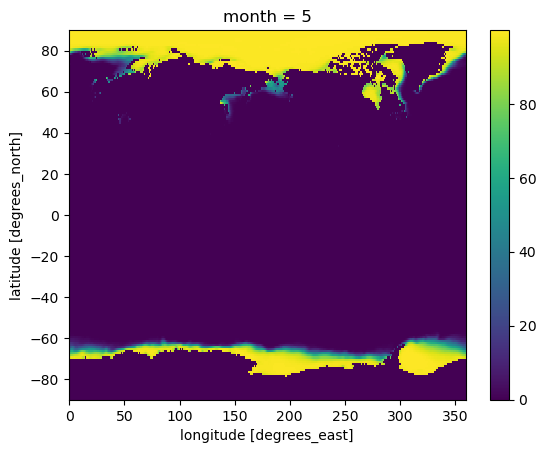

In [25]:
sea_ice_cover[4].plot()

In [26]:
sea_ice_cover = (sea_ice_cover > 0.2).astype(int)
sea_ice_cover

<xarray.DataArray (month: 12, lat: 180, lon: 360)> Size: 6MB
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]])
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

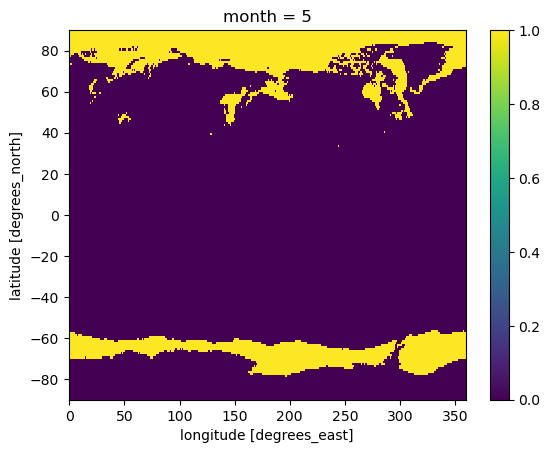

In [28]:
sea_ice_cover[4].plot()

## Historical interpolated files

### BCC-CSM2-MR model

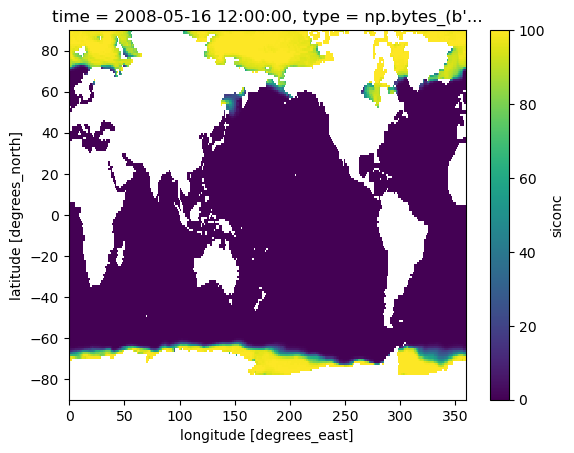

In [32]:
path_seaice1_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/BCC-CSM2-MR_hist_reprojete.nc"
sea_ice1_interp = xr.open_dataset(path_seaice1_interp)

sea_ice1_interp["siconc"][1900].plot()

In [33]:
sea_ice1_interp = sea_ice1_interp["siconc"]
sea_ice1_interp

<xarray.DataArray 'siconc' (time: 1980, lat: 180, lon: 360)> Size: 513MB
[128304000 values with dtype=float32]
Coordinates:
  * time     (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    type     |S7 7B ...
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5

In [34]:
sea_ice1_interp = sea_ice1_interp.sel(time=slice("1995", "2014"))

In [35]:
seaice_1 = sea_ice1_interp.groupby("time.month").mean(dim="time")

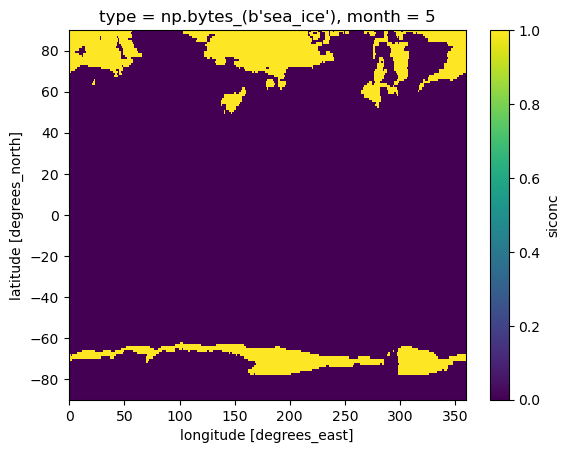

In [38]:
seaice_1 = (seaice_1 > 20).astype(int)
seaice_1[4].plot()

In [39]:
difference = sea_ice_cover - seaice_1
difference

<xarray.DataArray (month: 12, lat: 180, lon: 360)> Size: 6MB
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    type     |S7 7B ...

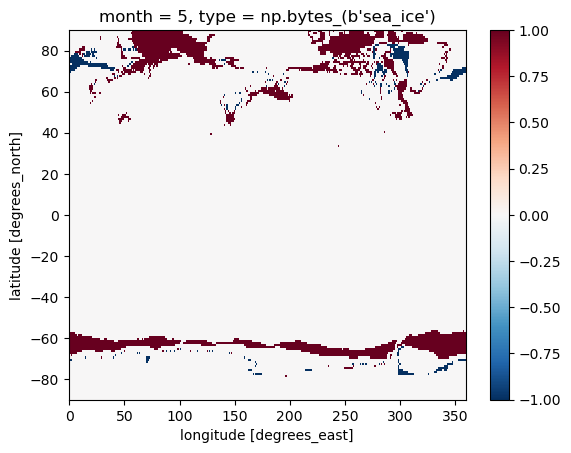

In [40]:
difference[4].plot()

### CAMS-CSM1-0 model

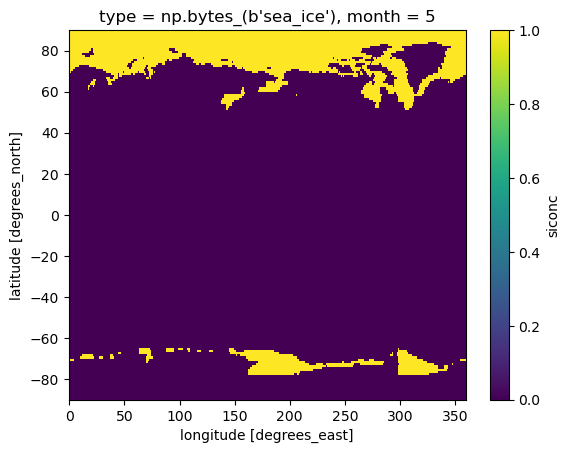

In [41]:
# path and file
path_seaice2_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/CAMS-CSM1-0_hist_reprojete.nc"
sea_ice2_interp = xr.open_dataset(path_seaice2_interp)

# select the variable
sea_ice2_interp = sea_ice2_interp["siconc"]

# select the time period
sea_ice2_interp = sea_ice2_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_2 = sea_ice2_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_2 = (seaice_2 > 20).astype(int)
seaice_2[4].plot()

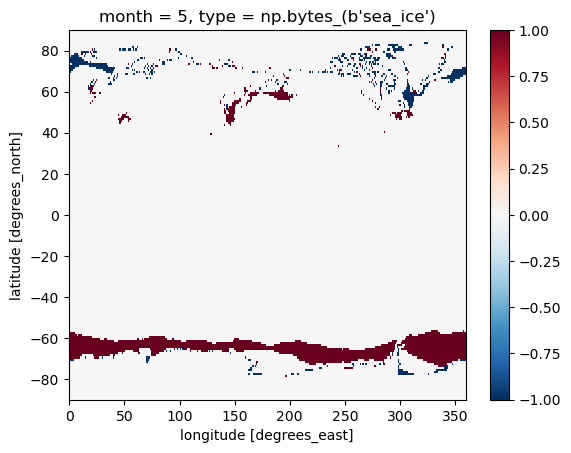

In [42]:
# compute & display the difference between observations & simulations
difference_2 = sea_ice_cover - seaice_2
difference_2[4].plot()

### CanESM5 model

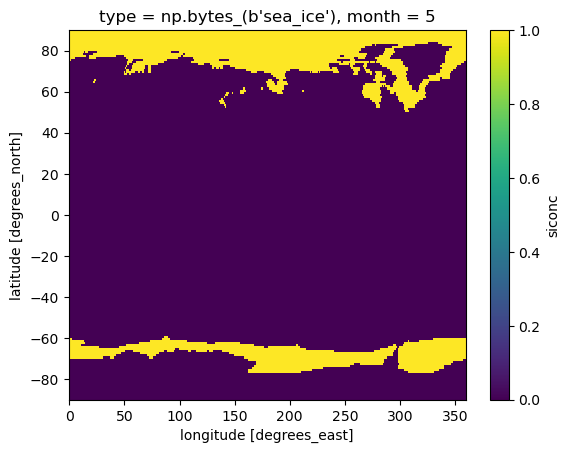

In [43]:
# path and file
path_seaice3_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/CanESM5_hist_reprojete.nc"
sea_ice3_interp = xr.open_dataset(path_seaice3_interp)

# select the variable
sea_ice3_interp = sea_ice3_interp["siconc"]

# select the time period
sea_ice3_interp = sea_ice3_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_3 = sea_ice3_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_3 = (seaice_3 > 20).astype(int)
seaice_3[4].plot()

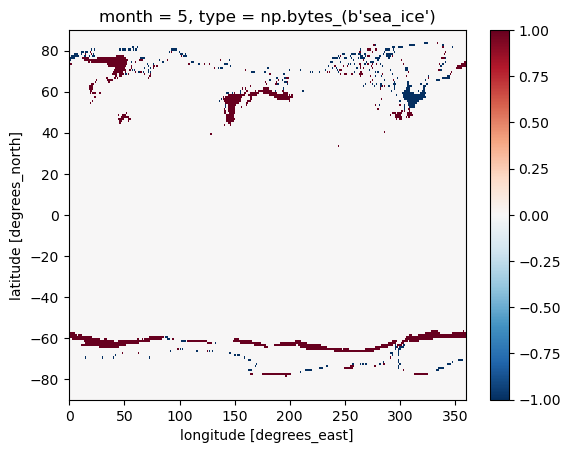

In [44]:
# compute & display the difference between observations & simulations
difference_3 = sea_ice_cover - seaice_3
difference_3[4].plot()

### CESM2 model

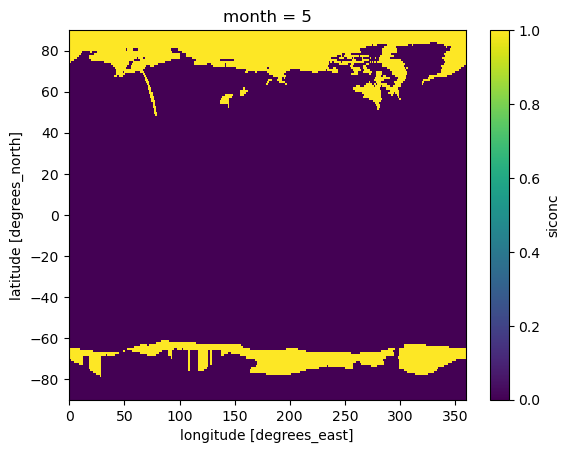

In [45]:
# path and file
path_seaice4_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/CESM2_hist_reprojete.nc"
sea_ice4_interp = xr.open_dataset(path_seaice4_interp)

# select the variable
sea_ice4_interp = sea_ice4_interp["siconc"]

# select the time period
sea_ice4_interp = sea_ice4_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_4 = sea_ice4_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_4 = (seaice_4 > 20).astype(int)
seaice_4[4].plot()

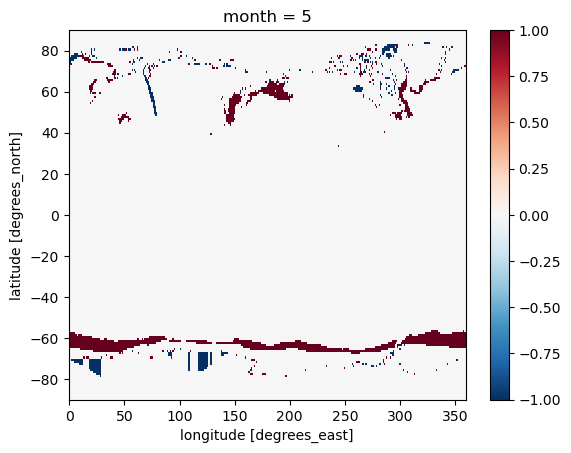

In [46]:
# compute & display the difference between observations & simulations
difference_4 = sea_ice_cover - seaice_4
difference_4[4].plot()

### CESM2-WACCM model

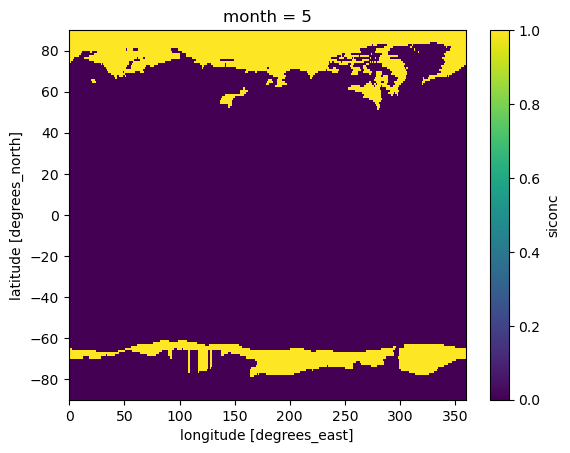

In [47]:
# path and file
path_seaice5_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/CESM2-WACCM_hist_reprojete.nc"
sea_ice5_interp = xr.open_dataset(path_seaice5_interp)

# select the variable
sea_ice5_interp = sea_ice5_interp["siconc"]

# select the time period
sea_ice5_interp = sea_ice5_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_5 = sea_ice5_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_5 = (seaice_5 > 20).astype(int)
seaice_5[4].plot()

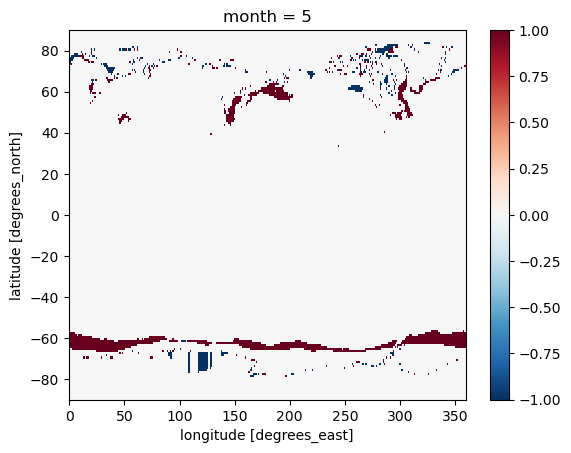

In [48]:
# compute & display the difference between observations & simulations
difference_5 = sea_ice_cover - seaice_5
difference_5[4].plot()

### CNRM-CM6-1 model

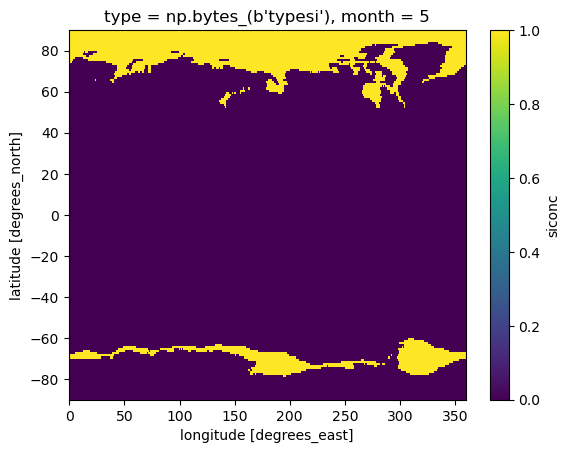

In [51]:
# path and file
path_seaice6_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/CNRM-CM6-1_hist_reprojete.nc"
sea_ice6_interp = xr.open_dataset(path_seaice6_interp)

# select the variable
sea_ice6_interp = sea_ice6_interp["siconc"]

# select the time period
sea_ice6_interp = sea_ice6_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_6 = sea_ice6_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_6 = (seaice_6 > 20).astype(int)
seaice_6[4].plot()

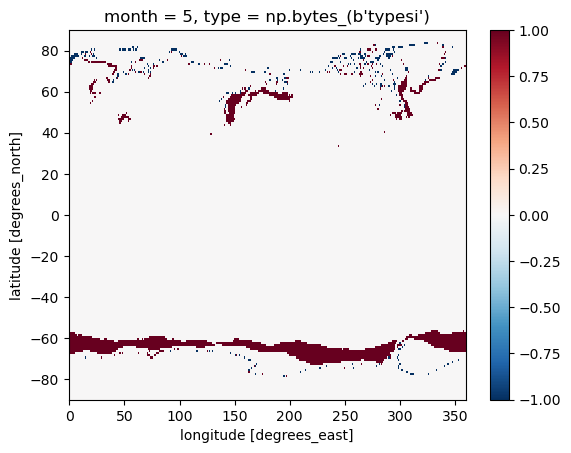

In [52]:
# compute & display the difference between observations & simulations
difference_6 = sea_ice_cover - seaice_6
difference_6[4].plot()

### CNRM-CM6-1-HR model

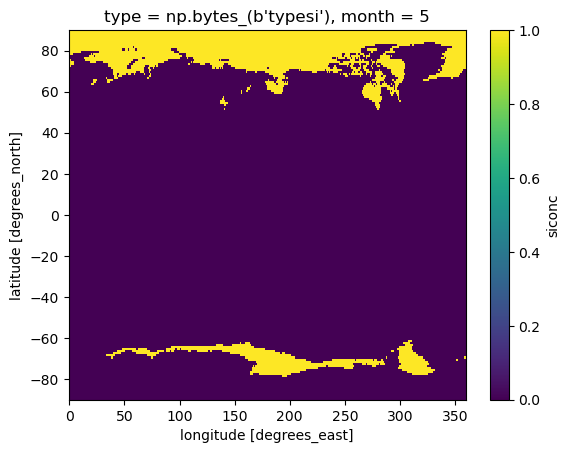

In [53]:
# path and file
path_seaice7_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/CNRM-CM6-1-HR_hist_reprojete.nc"
sea_ice7_interp = xr.open_dataset(path_seaice7_interp)

# select the variable
sea_ice7_interp = sea_ice7_interp["siconc"]

# select the time period
sea_ice7_interp = sea_ice7_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_7 = sea_ice7_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_7 = (seaice_7 > 20).astype(int)
seaice_7[4].plot()

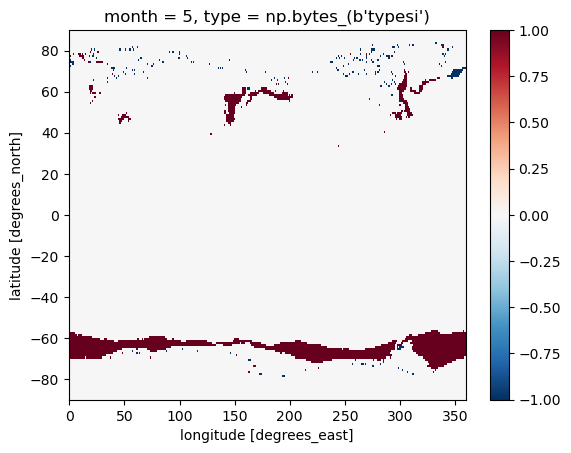

In [55]:
# compute & display the difference between observations & simulations
difference_7 = sea_ice_cover - seaice_7
difference_7[4].plot()

### FGOALS-f3-L model

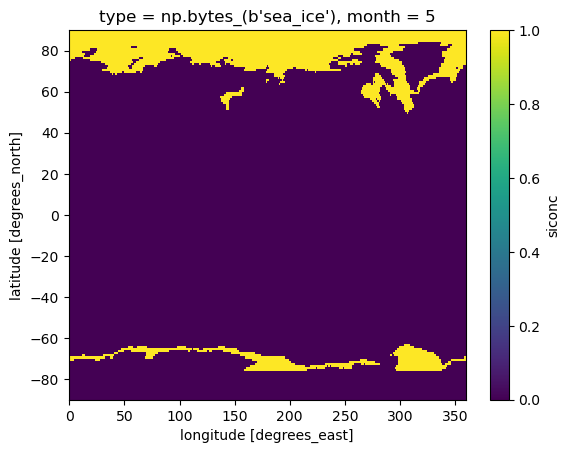

In [57]:
# path and file
path_seaice8_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/FGOALS-f3-L_hist_reprojete.nc"
sea_ice8_interp = xr.open_dataset(path_seaice8_interp)

# select the variable
sea_ice8_interp = sea_ice8_interp["siconc"]

# select the time period
sea_ice8_interp = sea_ice8_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_8 = sea_ice8_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_8 = (seaice_8 > 20).astype(int)
seaice_8[4].plot()

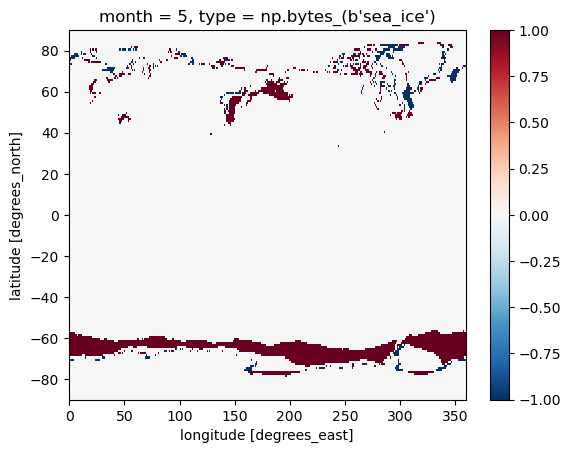

In [58]:
# compute & display the difference between observations & simulations
difference_8 = sea_ice_cover - seaice_8
difference_8[4].plot()

### FIO-ESM-2-0 model

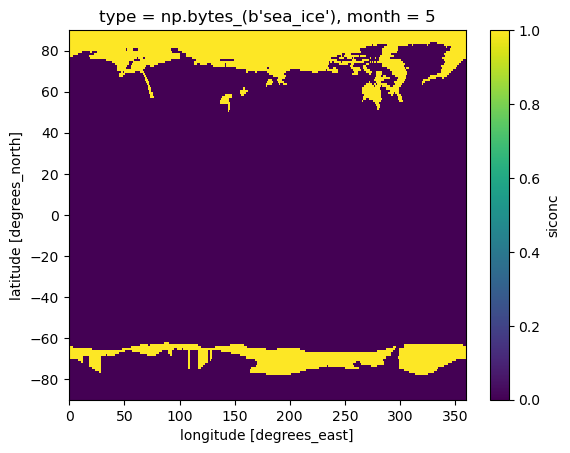

In [59]:
# path and file
path_seaice9_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/FIO-ESM-2-0_hist_reprojete.nc"
sea_ice9_interp = xr.open_dataset(path_seaice9_interp)

# select the variable
sea_ice9_interp = sea_ice9_interp["siconc"]

# select the time period
sea_ice9_interp = sea_ice9_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_9 = sea_ice9_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_9 = (seaice_9 > 20).astype(int)
seaice_9[4].plot()

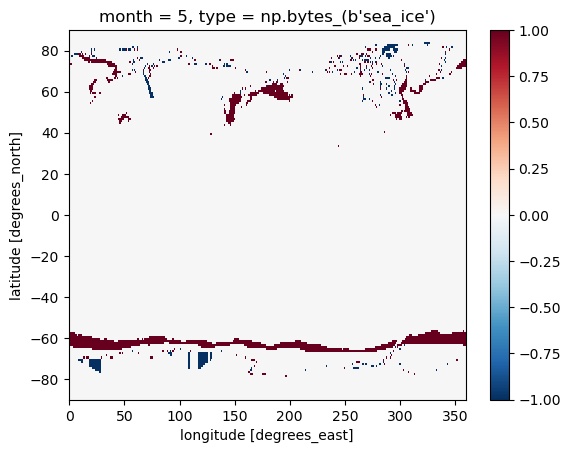

In [60]:
# compute & display the difference between observations & simulations
difference_9 = sea_ice_cover - seaice_9
difference_9[4].plot()

### GFDL-CM4 model

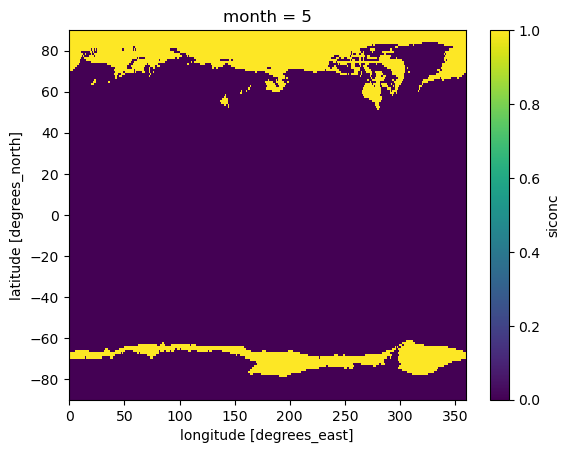

In [61]:
# path and file
path_seaice10_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/GFDL-CM4_hist_reprojete.nc"
sea_ice10_interp = xr.open_dataset(path_seaice10_interp)

# select the variable
sea_ice10_interp = sea_ice10_interp["siconc"]

# select the time period
sea_ice10_interp = sea_ice10_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_10 = sea_ice10_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_10 = (seaice_10 > 20).astype(int)
seaice_10[4].plot()

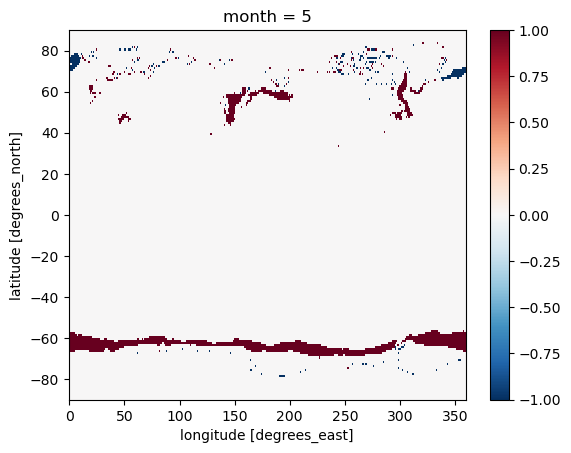

In [62]:
# compute & display the difference between observations & simulations
difference_10 = sea_ice_cover - seaice_10
difference_10[4].plot()

### GFDL-ESM4 model

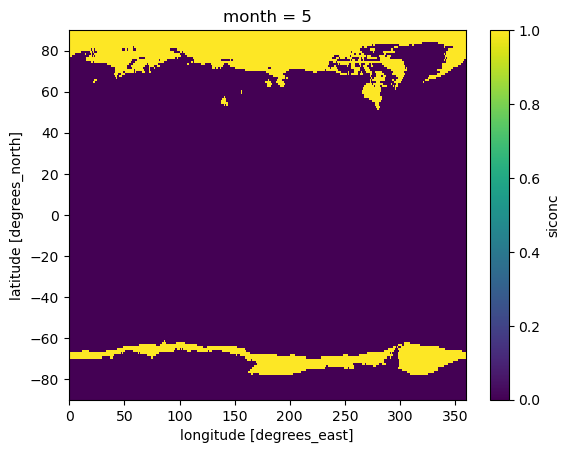

In [63]:
# path and file
path_seaice11_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/GFDL-ESM4_hist_reprojete.nc"
sea_ice11_interp = xr.open_dataset(path_seaice11_interp)

# select the variable
sea_ice11_interp = sea_ice11_interp["siconc"]

# select the time period
sea_ice11_interp = sea_ice11_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_11 = sea_ice11_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_11 = (seaice_11 > 20).astype(int)
seaice_11[4].plot()

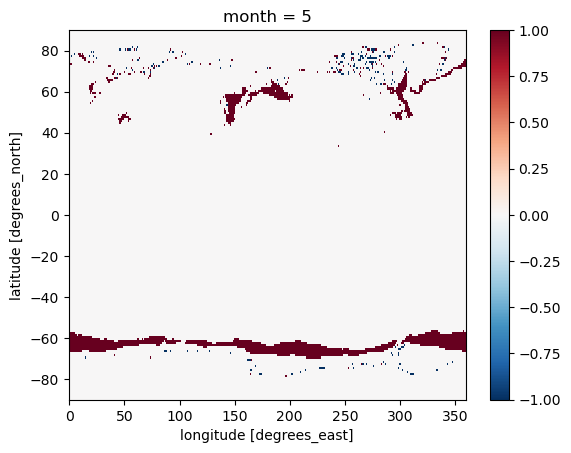

In [64]:
# compute & display the difference between observations & simulations
difference_11 = sea_ice_cover - seaice_11
difference_11[4].plot()

### INM-CM4-8 model

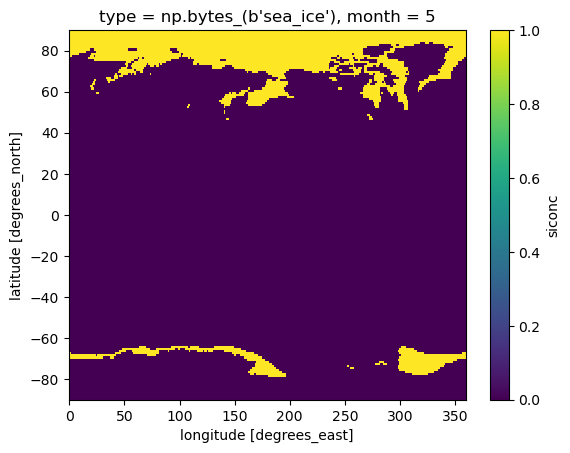

In [65]:
# path and file
path_seaice12_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/INM-CM4-8_hist_reprojete.nc"
sea_ice12_interp = xr.open_dataset(path_seaice12_interp)

# select the variable
sea_ice12_interp = sea_ice12_interp["siconc"]

# select the time period
sea_ice12_interp = sea_ice12_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_12 = sea_ice12_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_12 = (seaice_12 > 20).astype(int)
seaice_12[4].plot()

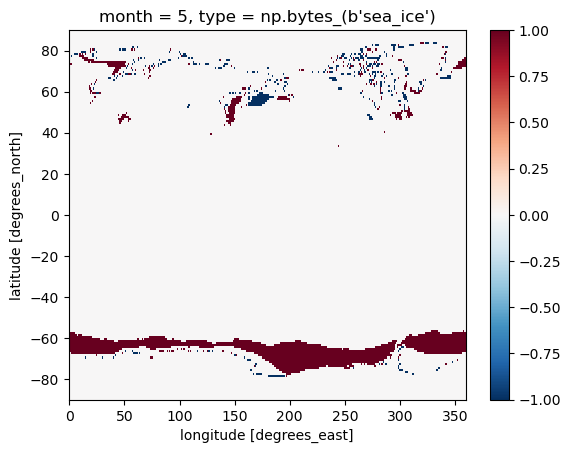

In [66]:
# compute & display the difference between observations & simulations
difference_12 = sea_ice_cover - seaice_12
difference_12[4].plot()

### INM-CM5-0 model

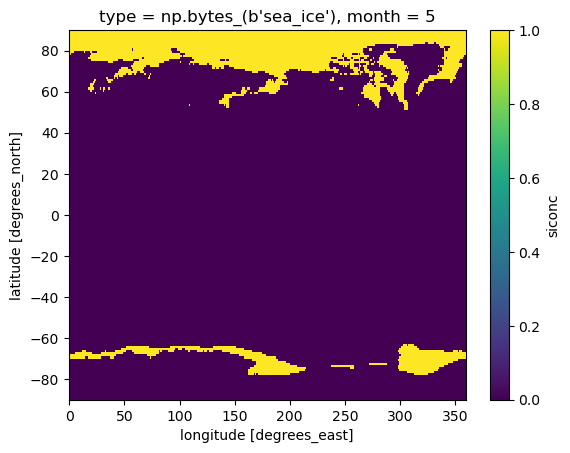

In [67]:
# path and file
path_seaice13_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/INM-CM5-0_hist_reprojete.nc"
sea_ice13_interp = xr.open_dataset(path_seaice13_interp)

# select the variable
sea_ice13_interp = sea_ice13_interp["siconc"]

# select the time period
sea_ice13_interp = sea_ice13_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_13 = sea_ice13_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_13 = (seaice_13 > 20).astype(int)
seaice_13[4].plot()

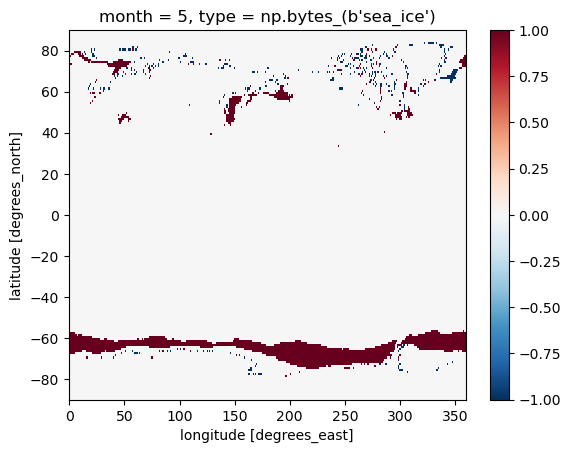

In [68]:
# compute & display the difference between observations & simulations
difference_13 = sea_ice_cover - seaice_13
difference_13[4].plot()

### IPSL-CM6A-LR model

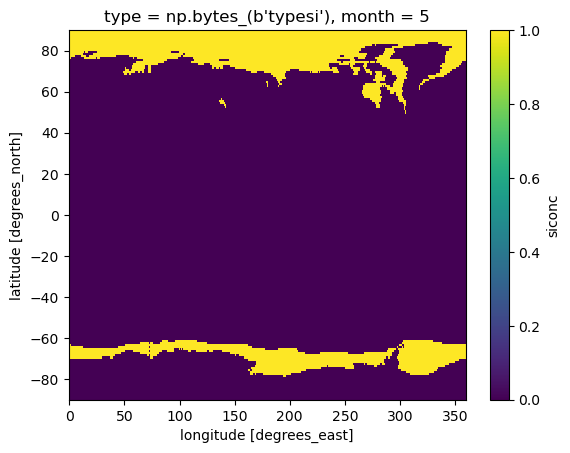

In [69]:
# path and file
path_seaice14_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/IPSL-CM6A-LR_hist_reprojete.nc"
sea_ice14_interp = xr.open_dataset(path_seaice14_interp)

# select the variable
sea_ice14_interp = sea_ice14_interp["siconc"]

# select the time period
sea_ice14_interp = sea_ice14_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_14 = sea_ice14_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_14 = (seaice_14 > 20).astype(int)
seaice_14[4].plot()

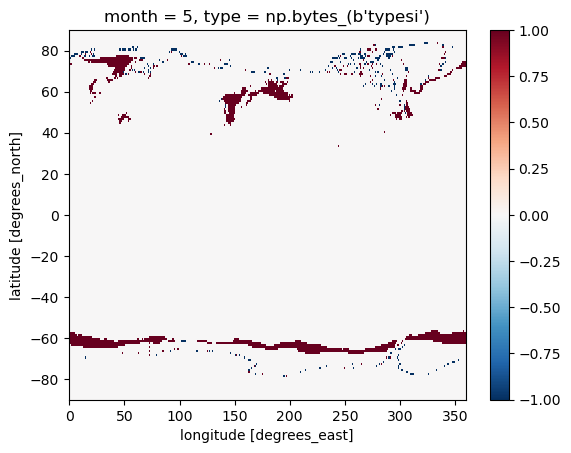

In [70]:
# compute & display the difference between observations & simulations
difference_14 = sea_ice_cover - seaice_14
difference_14[4].plot()

### MIROC-ES2L model

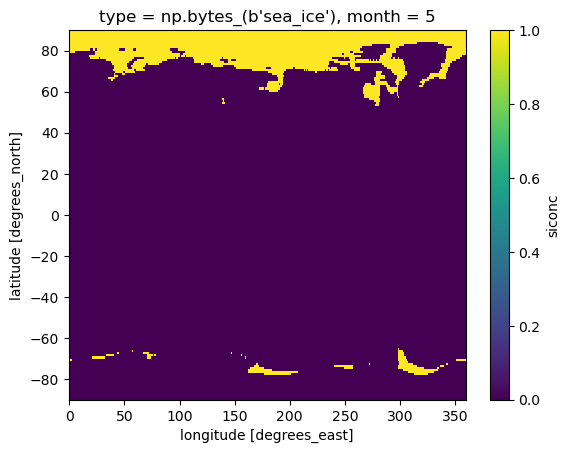

In [71]:
# path and file
path_seaice15_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/MIROC-ES2L_hist_reprojete.nc"
sea_ice15_interp = xr.open_dataset(path_seaice15_interp)

# select the variable
sea_ice15_interp = sea_ice15_interp["siconc"]

# select the time period
sea_ice15_interp = sea_ice15_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_15 = sea_ice15_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_15 = (seaice_15 > 20).astype(int)
seaice_15[4].plot()

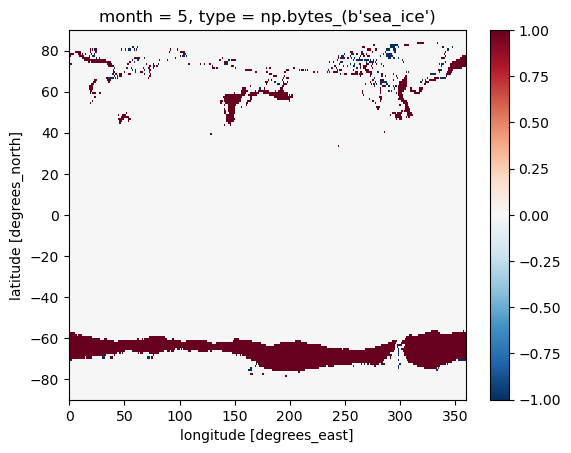

In [72]:
# compute & display the difference between observations & simulations
difference_15 = sea_ice_cover - seaice_15
difference_15[4].plot()

### MIROC6 model

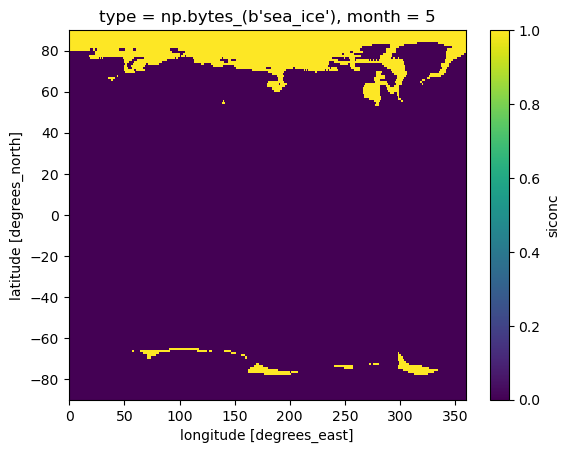

In [73]:
# path and file
path_seaice16_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/MIROC6_hist_reprojete.nc"
sea_ice16_interp = xr.open_dataset(path_seaice16_interp)

# select the variable
sea_ice16_interp = sea_ice16_interp["siconc"]

# select the time period
sea_ice16_interp = sea_ice16_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_16 = sea_ice16_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_16 = (seaice_16 > 20).astype(int)
seaice_16[4].plot()

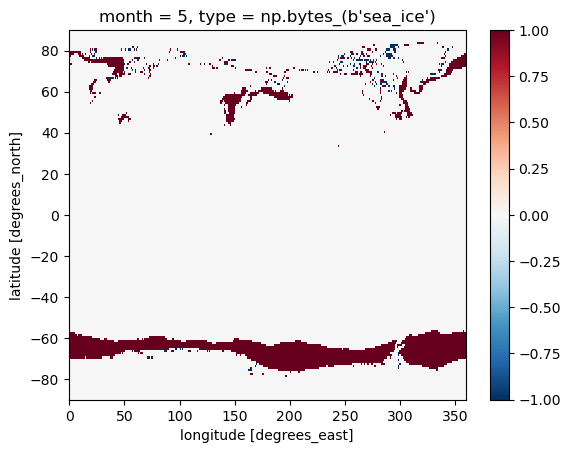

In [74]:
# compute & display the difference between observations & simulations
difference_16 = sea_ice_cover - seaice_16
difference_16[4].plot()

### MPI-ESM1-2-HR model

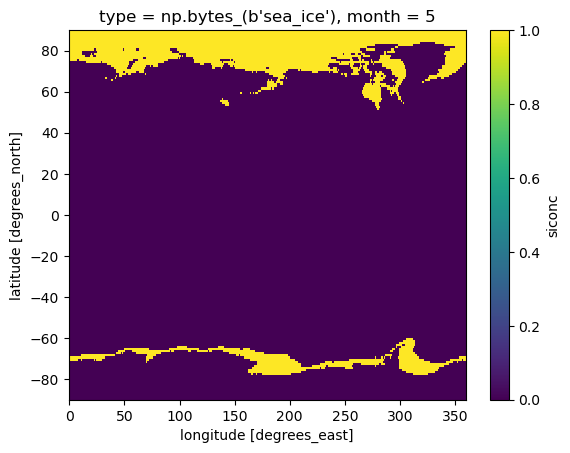

In [75]:
# path and file
path_seaice17_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/MPI-ESM1-2-HR_hist_reprojete.nc"
sea_ice17_interp = xr.open_dataset(path_seaice17_interp)

# select the variable
sea_ice17_interp = sea_ice17_interp["siconc"]

# select the time period
sea_ice17_interp = sea_ice17_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_17 = sea_ice17_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_17 = (seaice_17 > 20).astype(int)
seaice_17[4].plot()

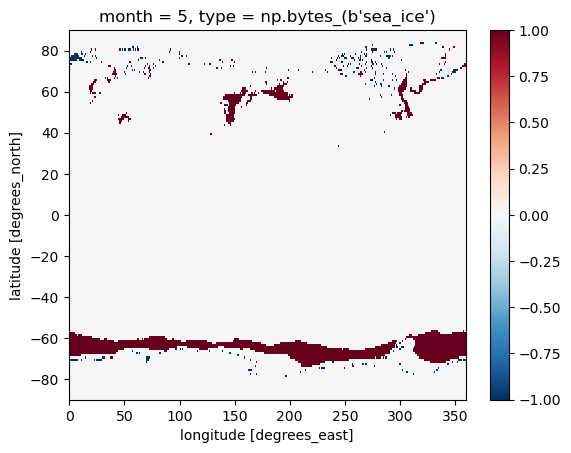

In [76]:
# compute & display the difference between observations & simulations
difference_17 = sea_ice_cover - seaice_17
difference_17[4].plot()

### MRI-ESM2-0 model

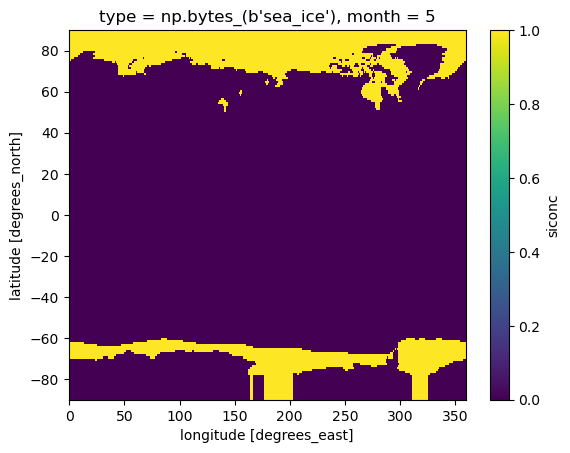

In [77]:
# path and file
path_seaice18_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/MRI-ESM2-0_hist_reprojete.nc"
sea_ice18_interp = xr.open_dataset(path_seaice18_interp)

# select the variable
sea_ice18_interp = sea_ice18_interp["siconc"]

# select the time period
sea_ice18_interp = sea_ice18_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_18 = sea_ice18_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_18 = (seaice_18 > 20).astype(int)
seaice_18[4].plot()

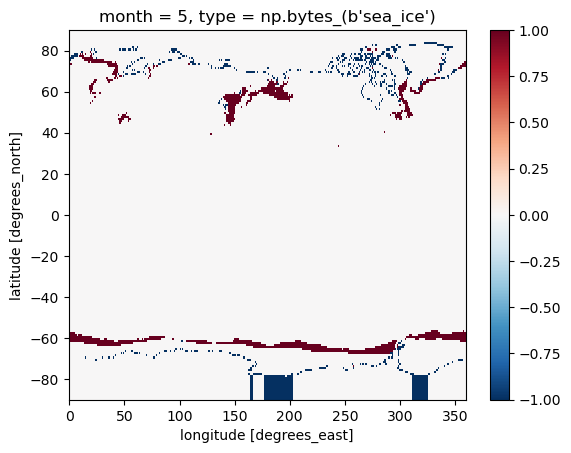

In [78]:
# compute & display the difference between observations & simulations
difference_18 = sea_ice_cover - seaice_18
difference_18[4].plot()

### NESM3 model

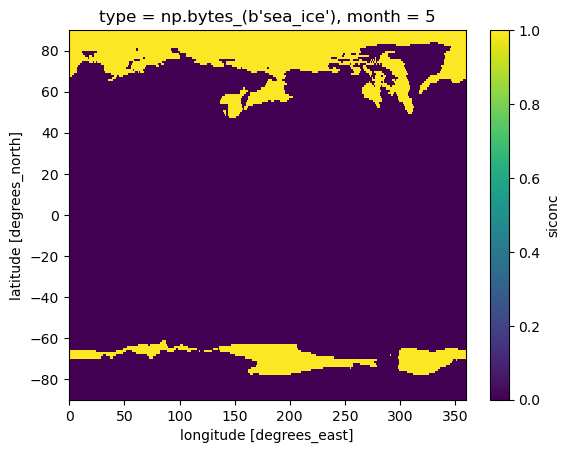

In [79]:
# path and file
path_seaice19_interp = "/home/jovyan/private-storage/output_data/sea_ice_interp/NESM3_hist_reprojete.nc"
sea_ice19_interp = xr.open_dataset(path_seaice19_interp)

# select the variable
sea_ice19_interp = sea_ice19_interp["siconc"]

# select the time period
sea_ice19_interp = sea_ice19_interp.sel(time=slice("1995", "2014"))

# group by month
seaice_19 = sea_ice19_interp.groupby("time.month").mean(dim="time")

# select the 20% threshold & plot the result
seaice_19 = (seaice_19 > 20).astype(int)
seaice_19[4].plot()

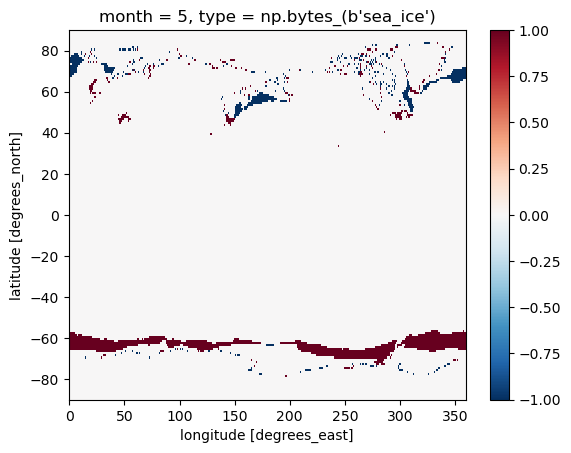

In [80]:
# compute & display the difference between observations & simulations
difference_19 = sea_ice_cover - seaice_19
difference_19[4].plot()